In [1]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


####  penalty  正则项  默认  l2  那么 none时为 l2
####  l1_ratio  elasticnet	时的参数  默认0.15
####  alpha 常数乘以正则化项
####  max_iter 最大迭代次数
####  random_state 随机种子  建议删除这个特征
####  n_jobs cpu数目  去众数  4核心
####  n_samples 样本数量 
####  n_features  特征数量
####  n_classes 标签数
####  n_clusters_per_class  每个类的簇数
####  n_informative 信息功能的数量
####  flip_y 等级随机交换的样本分数    值越大分类任务越难 耗时时间越长
####  scale 缩放 按指定值乘以要素。如果为None，则通过[1,100]中绘制的随机值缩放要素。请注意，移位后会进行缩放。

In [2]:
data=pd.read_csv('/Users/zwangeb/Desktop/5001 Foundations of Data Analytics/new/individual project/train.csv',index_col='id')

In [3]:
data['penalty']=data['penalty'].replace('none','l2')
data['n_jobs']=data['n_jobs'].replace(-1,4)

In [4]:
data=data.reindex(np.random.permutation(data.index))

In [5]:
data.shape

(400, 14)

In [6]:
data.columns

Index(['penalty', 'l1_ratio', 'alpha', 'max_iter', 'random_state', 'n_jobs',
       'n_samples', 'n_features', 'n_classes', 'n_clusters_per_class',
       'n_informative', 'flip_y', 'scale', 'time'],
      dtype='object')

In [7]:
data

,penalty,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,time
id,,,,,,,,,,,,,,
34,l2,0.797149,0.0010,794,684,2,826,327,3,5,10,0.064561,71.068914,0.803498
236,l2,0.755632,0.0100,639,295,8,335,621,3,2,5,0.099866,99.012644,0.204247
299,l2,0.376617,0.0001,217,6,4,641,1030,4,5,7,0.083381,89.089555,0.210282
12,elasticnet,0.421956,0.0010,618,460,4,628,195,3,5,9,0.077584,12.870010,0.803387
337,l2,0.868868,0.0100,357,728,4,158,1342,6,3,11,0.086974,55.422543,0.203180
40,l1,0.245255,0.0010,452,293,4,1194,1028,8,2,8,0.066705,64.354533,3.616493
37,l2,0.378960,0.0010,265,571,8,602,530,3,4,7,0.011068,61.642109,0.204308
44,l2,0.895220,0.0100,255,264,4,1064,627,7,4,8,0.042556,2.710737,0.503880
251,l2,0.374275,0.0100,221,52,4,917,1086,9,3,9,0.074556,53.020916,0.512045


In [8]:
data=pd.get_dummies(data)

In [9]:
data.head()

,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,time,penalty_elasticnet,penalty_l1,penalty_l2
id,,,,,,,,,,,,,,,,
34,0.797149,0.0010,794,684,2,826,327,3,5,10,0.064561,71.068914,0.803498,0,0,1
236,0.755632,0.0100,639,295,8,335,621,3,2,5,0.099866,99.012644,0.204247,0,0,1
299,0.376617,0.0001,217,6,4,641,1030,4,5,7,0.083381,89.089555,0.210282,0,0,1
12,0.421956,0.0010,618,460,4,628,195,3,5,9,0.077584,12.870010,0.803387,1,0,0
337,0.868868,0.0100,357,728,4,158,1342,6,3,11,0.086974,55.422543,0.203180,0,0,1


In [10]:
data.shape

(400, 16)

In [11]:
def preprocess_features(data):
    selected_features=data[
            ["penalty_l1",
             "penalty_l2",
             "penalty_elasticnet",
             "l1_ratio",
             "alpha",
             "max_iter",
             "n_jobs",
             "n_samples",
             "n_features",
             "n_classes",
             "n_clusters_per_class",
             "n_informative",
             "flip_y",
             "scale"
            ]
        ]
    processed_features=selected_features.copy()
    
    return processed_features

In [12]:
def preprocess_targets(california_housing_dataframe):
    output_targets=pd.DataFrame()
    output_targets["time"] = california_housing_dataframe["time"]
    return output_targets

In [13]:
training_examples=preprocess_features(data.head(350))
training_targets=preprocess_targets(data.head(350))

validation_examples=preprocess_features(data.tail(50))
validation_targets=preprocess_targets(data.tail(50))

In [14]:
def construct_feature_columns(input_features):
    return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [15]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    features = {key:np.array(value) for key,value in dict(features).items()}                                            
    ds = Dataset.from_tensor_slices((features,targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    #是否shuffle
    if shuffle:
        ds = ds.shuffle(100)
    # 返回下一批次数据
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [16]:
def train_nn_regression_model(my_optimizer,
                              steps,
                              batch_size,
                              hidden_units,
                              training_examples,
                              training_targets,
                              validation_examples,
                              validation_targets
                             ):
    periods=10
    steps_per_period=steps/periods
    
    my_optimizer=tf.contrib.estimator.clip_gradients_by_norm(my_optimizer,5.0)
    dnn_regressor=tf.estimator.DNNRegressor(
        feature_columns=construct_feature_columns(training_examples),
        hidden_units=hidden_units,
        optimizer=my_optimizer
        )
    training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["time"], 
                                          batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["time"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["time"], 
                                                    num_epochs=1, 
                                                    shuffle=False)
    print("开始训练模型：")
    training_rmse = []
    validation_rmse = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        dnn_regressor.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )
        # 预测
        training_predictions = dnn_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions = np.array([item['predictions'] for item in training_predictions])
    
        
        validation_predictions = dnn_regressor.predict(input_fn=predict_validation_input_fn)
        validation_predictions = np.array([item['predictions'] for item in validation_predictions])
        
        #计算损失函数值
        training_root_mean_squared_error = metrics.mean_squared_error(training_predictions, training_targets)
        validation_root_mean_squared_error = metrics.mean_squared_error(validation_predictions, validation_targets)
        # 打印批次和损失函数
        print("  批次 %02d 训练mse: %0.2f  验证mse: %0.2f" % (period, training_root_mean_squared_error,validation_root_mean_squared_error))

        #将损失函数值加入到列表内，等会有用
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
    print("模型训练完成")
  
    # 画图
    plt.ylabel("LogLoss")
    plt.xlabel("p")
    plt.title("LogLoss and p")
    plt.tight_layout()
    plt.plot(training_rmse, label="training")
    plt.plot(validation_rmse, label="validation")
    plt.legend()
    plt.show()
    return dnn_regressor, training_rmse, validation_rmse

In [17]:
def linear_scale(series):
    min_val=series.min()
    max_val=series.max()
    scale=(max_val-min_val)/2.0
    return series.apply(lambda x:((x-min_val)/scale)-1.0)

In [18]:
def normalize_linear_scale(examples_dataframe):
    processed_features = pd.DataFrame()
    processed_features["l1_ratio"] = linear_scale(examples_dataframe["l1_ratio"])
    processed_features["alpha"] = linear_scale(examples_dataframe["alpha"])
    processed_features["max_iter"] = linear_scale(examples_dataframe["max_iter"])
    processed_features["n_jobs"] = linear_scale(examples_dataframe["n_jobs"])
    processed_features["n_samples"] = linear_scale(examples_dataframe["n_samples"])
    processed_features["n_features"] = linear_scale(examples_dataframe["n_features"])
    processed_features["n_classes"] = linear_scale(examples_dataframe["n_classes"])
    processed_features["n_clusters_per_class"] = linear_scale(examples_dataframe["n_clusters_per_class"])
    processed_features["n_informative"] = linear_scale(examples_dataframe["n_informative"])
    processed_features["flip_y"] = linear_scale(examples_dataframe["flip_y"])
    processed_features["penalty_elasticnet"] = linear_scale(examples_dataframe["penalty_elasticnet"])
    processed_features["scale"] = linear_scale(examples_dataframe["scale"])
    processed_features["penalty_l1"] = linear_scale(examples_dataframe["penalty_l1"])
    processed_features["penalty_l2"] = linear_scale(examples_dataframe["penalty_l2"])
    return processed_features

In [19]:
normalized_dataframe = normalize_linear_scale(preprocess_features(data))
normalized_training_examples = normalized_dataframe.head(350)
normalized_validation_examples = normalized_dataframe.tail(50)

In [20]:
normalized_training_examples

,l1_ratio,alpha,max_iter,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,penalty_elasticnet,scale,penalty_l1,penalty_l2
id,,,,,,,,,,,,,,
34,0.753239,-0.818182,0.544134,-0.714286,0.119507,-0.662782,-0.75,1.000000,0.428571,0.292611,-1.0,0.416019,-1.0,1.0
236,0.648774,1.000000,0.197765,1.000000,-0.637625,-0.205905,-0.75,-1.000000,-1.000000,1.000000,-1.0,0.985018,-1.0,1.0
299,-0.304884,-1.000000,-0.745251,-0.142857,-0.165767,0.429681,-0.50,1.000000,-0.428571,0.669690,-1.0,0.782961,-1.0,1.0
12,-0.190804,-0.818182,0.150838,-0.142857,-0.185813,-0.867910,-0.75,1.000000,0.142857,0.553546,1.0,-0.769043,-1.0,-1.0
337,0.933694,1.000000,-0.432402,-0.142857,-0.910563,0.914530,0.00,-0.333333,0.714286,0.741684,-1.0,0.097424,-1.0,1.0
40,-0.635411,-0.818182,-0.220112,-0.142857,0.686970,0.426573,0.50,-1.000000,-0.142857,0.335570,-1.0,0.279299,1.0,-1.0
37,-0.298989,-0.818182,-0.637989,1.000000,-0.225906,-0.347319,-0.75,0.333333,-0.428571,-0.779177,-1.0,0.224068,-1.0,1.0
44,1.000000,1.000000,-0.660335,-0.142857,0.486507,-0.196581,0.25,0.333333,-0.142857,-0.148277,-1.0,-0.975909,-1.0,1.0
251,-0.310777,1.000000,-0.736313,-0.142857,0.259830,0.516706,0.75,-0.333333,0.142857,0.492872,-1.0,0.048521,-1.0,1.0


开始训练模型：
  批次 00 训练mse: 0.16  验证mse: 5.49
  批次 01 训练mse: 0.10  验证mse: 5.53
  批次 02 训练mse: 0.09  验证mse: 5.43
  批次 03 训练mse: 0.07  验证mse: 5.30
  批次 04 训练mse: 0.06  验证mse: 5.09
  批次 05 训练mse: 0.05  验证mse: 5.02
  批次 06 训练mse: 0.05  验证mse: 4.96
  批次 07 训练mse: 0.05  验证mse: 4.95
  批次 08 训练mse: 0.05  验证mse: 5.07
  批次 09 训练mse: 0.05  验证mse: 5.19
模型训练完成


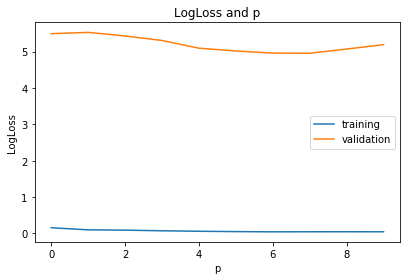

In [71]:
dnn_regressor, training_rmse, validation_rmse = train_nn_regression_model(
    my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01),
    steps=30000,
    batch_size=500,
    hidden_units=[16,16,16],
    training_examples=normalized_training_examples,
    training_targets=training_targets,
    validation_examples=normalized_validation_examples,
    validation_targets=validation_targets)

In [72]:
testDF=pd.read_csv('/Users/zwangeb/Desktop/5001 Foundations of Data Analytics/new/individual project/test.csv',index_col='id')

In [73]:
testDF['penalty']=testDF['penalty'].replace('none','l2')
testDF['n_jobs']=testDF['n_jobs'].replace(-1,4)

In [74]:
testDF=pd.get_dummies(testDF)
testDF['time']=0

In [75]:
testDF

,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,penalty_elasticnet,penalty_l1,penalty_l2,time
id,,,,,,,,,,,,,,,,
0,0.690384,0.0010,602,890,4,1376,1078,3,4,8,0.049072,40.832757,0,0,1,0
1,0.215088,0.0010,522,357,4,598,1528,10,3,11,0.041393,68.611537,1,0,0,0
2,0.217458,0.0010,398,105,16,553,1008,8,5,8,0.005987,61.713892,0,0,1,0
3,0.120303,0.0010,439,586,16,1977,1319,3,4,10,0.002964,58.631194,0,0,1,0
4,0.458851,0.0100,278,246,4,1826,1530,7,5,8,0.050126,87.315374,0,0,1,0
5,0.580799,0.0100,886,703,4,557,1647,5,4,8,0.070937,78.830594,0,1,0,0
6,0.893885,0.0010,983,241,2,300,1744,7,5,11,0.074611,40.178590,0,0,1,0
7,0.625540,0.0001,634,835,8,410,826,9,5,10,0.062585,30.479567,0,0,1,0
8,0.574535,0.0001,958,693,2,516,1433,5,2,8,0.050387,67.032764,1,0,0,0


In [76]:
test_normalized_dataframe = normalize_linear_scale(preprocess_features(testDF))

In [77]:
predict_validation_input_fn = lambda: my_input_fn(test_normalized_dataframe, 
                                                    testDF["time"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

In [78]:
test_predictions=dnn_regressor.predict(input_fn=predict_validation_input_fn)

In [79]:
test_predictions = np.array([item['predictions'] for item in test_predictions])

In [80]:
sample=pd.DataFrame(test_predictions)

In [81]:
sample['time']=sample[0]

In [82]:
sample.to_csv('/Users/zwangeb/Desktop/5001 Foundations of Data Analytics/new/individual project/samplesubmission.csv',columns=['time'],index_label='id')